In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Evaluation Metrics

from sklearn import metrics
%matplotlib inline

In [2]:
crimes1 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes2 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

C:\Users\Setup\AppData\Local\Temp\ipykernel_17156\3662695910.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crimes1 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
b'Skipping line 1149094: expected 23 fields, saw 41\n'
C:\Users\Setup\AppData\Local\Temp\ipykernel_17156\3662695910.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crimes2 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)


I'm going to combine the 2 files into 1 then delete the orignal ones afterwards to save memory.

In [3]:
crimes = pd.concat([crimes1, crimes2], ignore_index=False,axis=0)
del crimes1
del crimes2

In [4]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


There are some duplicates and null values so I'm going to drop them.

In [5]:
crimes = crimes.dropna()
crimes = crimes.drop_duplicates()

This dataset is so big that it's taking a lot of processing time so I'm dropping these columns that I'm not going to use.

In [6]:
crimes.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Location'], inplace=True, axis=1)

Convert dates to pandas datetime format.

In [7]:
crimes['date2'] = pd.to_datetime(crimes['Date'])
crimes['Year'] = crimes['date2'].dt.year
crimes['Month'] = crimes['date2'].dt.month
crimes['Day'] = crimes['date2'].dt.day
crimes['Hour'] = crimes['date2'].dt.hour
crimes['Minute'] = crimes['date2'].dt.minute
crimes['Second'] = crimes['date2'].dt.second 
crimes = crimes.drop(['Date'], axis=1) 
crimes = crimes.drop(['date2'], axis=1) 
crimes = crimes.drop(['Updated On'], axis=1)
crimes.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day,Hour,Minute,Second
0,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,323,3.0,6.0,69.0,01A,2008,41.758276,-87.622451,10,7,12,39,0
1,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,1533,15.0,24.0,25.0,01A,2008,41.870252,-87.746069,10,9,3,30,0
2,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,831,8.0,18.0,66.0,01A,2008,41.770990,-87.698901,10,9,8,35,0
3,052XX W CHICAGO AVE,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,1524,15.0,37.0,25.0,01A,2008,41.894917,-87.757358,10,10,2,33,0
4,026XX S HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,1032,10.0,22.0,30.0,01A,2008,41.843826,-87.709893,10,10,12,50,0


In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942864 entries, 0 to 1456713
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Community Area        float64
 10  FBI Code              object 
 11  Year                  int64  
 12  Latitude              float64
 13  Longitude             float64
 14  Month                 int64  
 15  Day                   int64  
 16  Hour                  int64  
 17  Minute                int64  
 18  Second                int64  
dtypes: bool(2), float64(5), int64(7), object(5)
memory usage: 409.8+ MB


The memory usage is 409.8+ MB. I had to make a subset because my computer keep having problem memory problem running such a big file.

In [9]:
crimes = crimes.sample(n=500000)

In [10]:
classes = crimes['Primary Type'].unique()
classes

array(['DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'THEFT', 'BATTERY',
       'OTHER OFFENSE', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT',
       'BURGLARY', 'GAMBLING', 'CRIMINAL TRESPASS', 'ASSAULT',
       'CRIM SEXUAL ASSAULT', 'PROSTITUTION',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'WEAPONS VIOLATION', 'LIQUOR LAW VIOLATION', 'ARSON', 'HOMICIDE',
       'SEX OFFENSE', 'KIDNAPPING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'INTIMIDATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'OBSCENITY',
       'NON-CRIMINAL', 'NON - CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'HUMAN TRAFFICKING'],
      dtype=object)

I'm going to eliminate none criminal crimes because I'm not interested in them.

In [11]:
crimes.drop(crimes.index [crimes[ 'Primary Type' ] == 'PUBLIC INDECENCY' ] , inplace = True)
crimes.drop(crimes.index [crimes[ 'Primary Type' ] == 'NON-CRIMINAL (SUBJECT SPECIFIED)' ] , inplace = True)
crimes.drop(crimes.index [crimes[ 'Primary Type' ] == 'NON-CRIMINAL' ] , inplace = True)
crimes.drop(crimes.index [crimes[ 'Primary Type' ] == 'NON - CRIMINAL' ] , inplace = True)
crimes.drop(crimes.index [crimes[ 'Primary Type' ] == 'OBSCENITY' ] , inplace = True)
crimes.drop(crimes.index [crimes[ 'Primary Type' ] == 'CONCEALED CARRY LICENSE VIOLATION' ] , inplace = True)

Then I'm going to group similar crimes together.

In [12]:
crimes_condition = [(crimes['Primary Type'] == 'MOTOR VEHICLE THEFT'),
                (crimes['Primary Type'] == 'THEFT'),
                (crimes['Primary Type'] == 'ROBBERY'),
                (crimes['Primary Type'] == 'BURGLARY'),
                (crimes['Primary Type'] == 'ASSAULT'),
                (crimes['Primary Type'] == 'PROSTITUTION'),
                (crimes['Primary Type'] == 'BATTERY'),
                (crimes['Primary Type'] == 'CRIM SEXUAL ASSAULT'),
                (crimes['Primary Type'] == 'SEX OFFENSE'),
                (crimes['Primary Type'] == 'INTIMIDATION'),
                (crimes['Primary Type'] == 'STALKING'),
                (crimes['Primary Type'] == 'ARSON'),
                (crimes['Primary Type'] == 'KIDNAPPING'),
                (crimes['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'),
                (crimes['Primary Type'] =='PUBLIC PEACE VIOLATION'),
                (crimes['Primary Type'] == 'OTHER NARCOTIC VIOLATION'),
                (crimes['Primary Type'] == 'NARCOTICS'),
                (crimes['Primary Type'] == 'LIQUOR LAW VIOLATION'),
                (crimes['Primary Type'] == 'CRIMINAL DAMAGE'),
                (crimes['Primary Type'] == 'HUMAN TRAFFICKING'),
                (crimes['Primary Type'] == 'WEAPONS VIOLATION'),
                (crimes['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER'),
                (crimes['Primary Type'] == 'CRIMINAL TRESPASS'),
                (crimes['Primary Type'] == 'HOMICIDE'),
                (crimes['Primary Type'] == 'DECEPTIVE PRACTICE'),
                (crimes['Primary Type'] == 'OTHER OFFENSE'),
                (crimes['Primary Type'] == 'GAMBLING'
                )
               ]
crimes_categ = ['THEFT', 'THEFT', 'THEFT','THEFT', 
            'ASSAULT' , 'ASSAULT' , 'ASSAULT' , 'ASSAULT', 'ASSAULT','ASSAULT','ASSAULT','ASSAULT','ASSAULT','ASSAULT', 'ASSAULT',
            'NARCOTICS', 'NARCOTICS', 'NARCOTICS',
            'CRIMINAL DAMAGE','CRIMINAL DAMAGE','CRIMINAL DAMAGE', 'CRIMINAL DAMAGE', 'CRIMINAL DAMAGE',
            'OTHER OFFENSE','OTHER OFFENSE','OTHER OFFENSE', 'OTHER OFFENSE']
crimes['Type'] = np.select(crimes_condition , crimes_categ)

I want to make some data visualization before asking my questions.

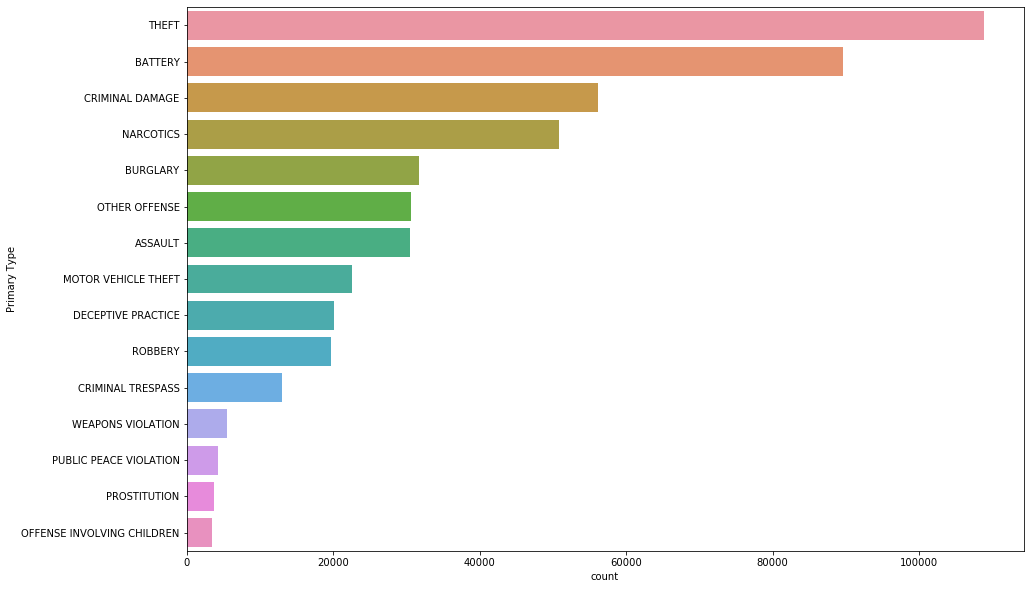

In [13]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = crimes, order = crimes['Primary Type'].value_counts().iloc[:15].index)

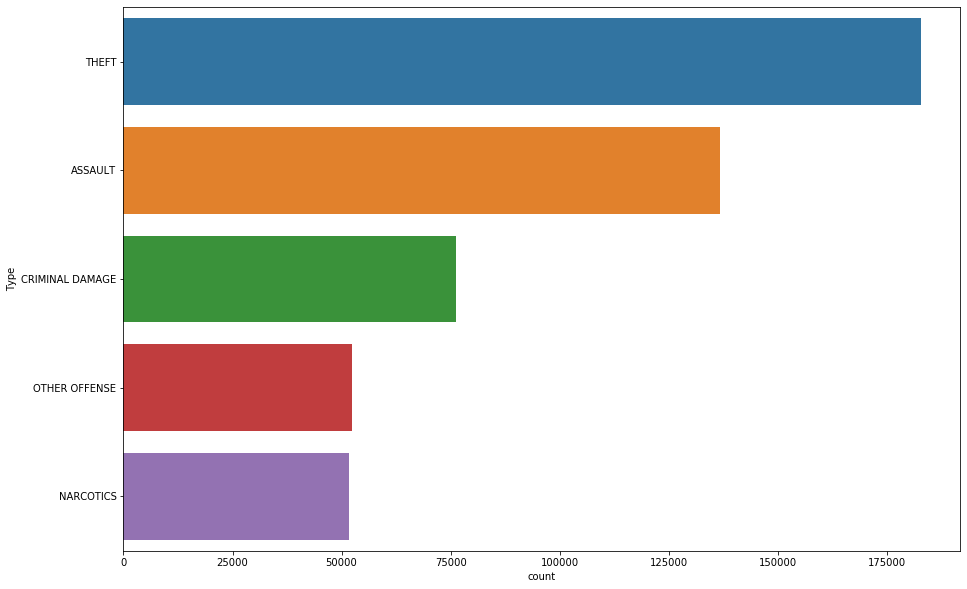

In [14]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Type', data = crimes, order = crimes['Type'].value_counts().iloc[:15].index)

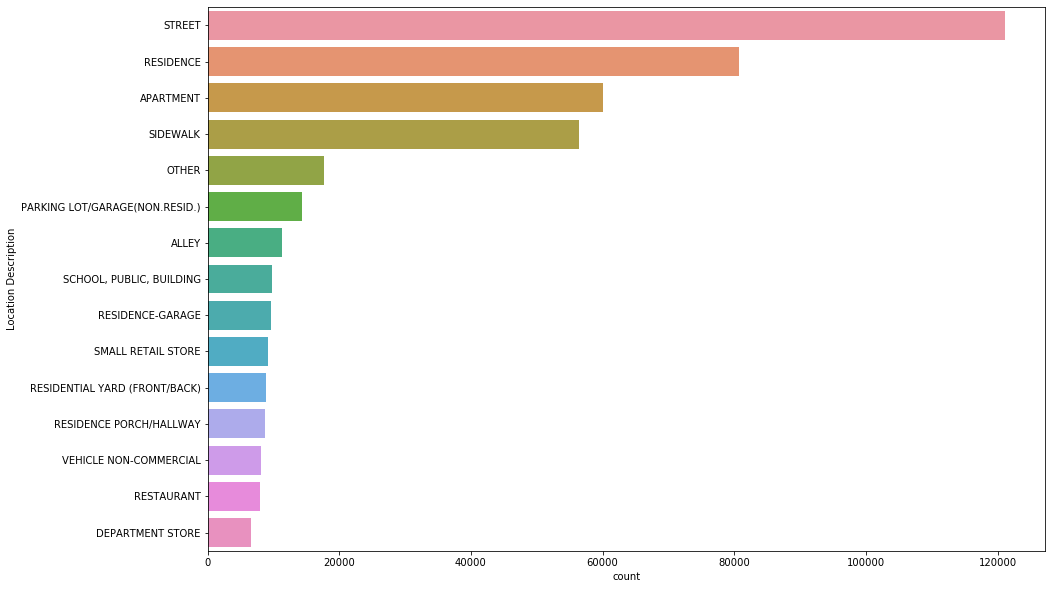

In [15]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crimes, order = crimes['Location Description'].value_counts().iloc[:15].index)

My questions are:
Can I predict type of crime based on location and month?
Can I predict type of crime based on arrest, location description, and month?
Can I predict if someone would get arrested or not based on type of crime and location description?

First, I'm converting categorical columns into numerical columns.

In [16]:
crimes['Type'] = pd.factorize(crimes["Type"])[0] 
crimes['Type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [17]:
crimes['Minute'] = pd.factorize(crimes["Minute"])[0] 
crimes['Minute'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [18]:
crimes['Longitude'] = pd.factorize(crimes["Longitude"])[0] 
crimes['Longitude'].unique()
crimes['Latitude'] = pd.factorize(crimes["Latitude"])[0] 
crimes['Latitude'].unique()

array([     0,      1,      2, ..., 220033, 220034, 220035], dtype=int64)

In [19]:
crimes.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day,Hour,Minute,Second,Type
1351495,026XX N MILWAUKEE AVE,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BAR OR TAVERN,False,False,1412,14.0,35.0,22.0,11,2016,0,0,8,29,2,0,0,0
460083,031XX S GREEN ST,CRIMINAL DAMAGE,TO STATE SUP PROP,CHA APARTMENT,False,False,913,9.0,11.0,60.0,14,2013,1,1,3,9,2,1,0,1
841568,002XX N LA SALLE ST,THEFT,FROM BUILDING,OTHER,False,False,113,1.0,42.0,32.0,06,2010,2,2,1,29,14,1,0,2
863190,009XX W RANDOLPH ST,THEFT,FROM BUILDING,OTHER,False,False,1224,12.0,27.0,28.0,06,2014,3,3,7,25,12,0,0,2
915224,078XX S YATES BLVD,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,RESIDENCE,False,False,414,4.0,7.0,43.0,04B,2014,4,4,9,27,16,1,0,3


In [49]:
target = 'Type'
features = ["Longitude", "Latitude", "Month"]

In [50]:
# split dataset to training set & test set
x, y = train_test_split(crimes, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[features]    # features to train
x2 = x[target]      # target Class to train
y1 = y[features]    # features to test
y2 = y[target]      # target Class to test

print('Feature Set Used    : ', features)
print('Target Class        : ', target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Longitude', 'Latitude', 'Month']
Target Class        :  Type
Training Set Size   :  (399907, 20)
Test Set Size       :  (99977, 20)


In [51]:
clf = KNeighborsClassifier(n_neighbors=100)

# model training
clf.fit(X=x1, y=x2)

# prediction
result = clf.predict(y[features])

In [52]:
accuracy = accuracy_score(y2, result)
recall = recall_score(y2, result, average="weighted")
precision = precision_score(y2, result, average="weighted")
confusion = confusion_matrix(y2, result)

print("K-Nearest Neighbors Results")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(confusion)

K-Nearest Neighbors Results
Accuracy    :  0.3714454324494634
Recall      :  0.3714454324494634
Precision   :  0.35190541227905986
Confusion Matrix: 
[[  244    62  8087  2067    23]
 [   56   145 11882  3111    34]
 [  159   160 29832  6569    38]
 [   89   150 20195  6819    47]
 [   54    70  7757  2231    96]]


In [53]:
forest = RandomForestClassifier(n_estimators=150, # number of trees 
                                  max_depth = 15)

# model training
forest.fit(X=x1,
           y=x2)

# prediction
result = forest.predict(y[features])

In [54]:
accuracy = accuracy_score(y2, result)
recall = recall_score(y2, result, average="weighted")
precision = precision_score(y2, result, average="weighted")
confusion = confusion_matrix(y2, result)

print("Random Forest Classifier Results")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(confusion)

Random Forest Classifier Results
Accuracy    :  0.37116536803464795
Recall      :  0.37116536803464795
Precision   :  0.376178657966231
Confusion Matrix: 
[[  127    16  9713   618     9]
 [   25    34 14144  1007    18]
 [   70    43 34574  2053    18]
 [   27    28 24933  2297    15]
 [   18    12  9347   755    76]]


For the first question, my results from K-nearest neighbor and Random Forest Classifier tests were not significant enough as they were both roughly 37%. So the answer is no, I can't make prediction on type of crime based on location and time.

This time, I'm converting all non-numerical columns into numerical.

In [34]:
target2 = 'Type'
features2 = ["Arrest", "Location Description", "Month"]

In [35]:
from sklearn.preprocessing import LabelEncoder

for col in features2:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        crimes[col] = globals()['LE_{}'.format(col)].fit_transform(crimes[col])
crimes.head()    

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day,Hour,Minute,Second,Type
1351495,026XX N MILWAUKEE AVE,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,23,0,False,1412,14.0,35.0,22.0,11,2016,0,0,7,29,2,0,0,0
460083,031XX S GREEN ST,CRIMINAL DAMAGE,TO STATE SUP PROP,32,0,False,913,9.0,11.0,60.0,14,2013,1,1,2,9,2,1,0,1
841568,002XX N LA SALLE ST,THEFT,FROM BUILDING,86,0,False,113,1.0,42.0,32.0,06,2010,2,2,0,29,14,1,0,2
863190,009XX W RANDOLPH ST,THEFT,FROM BUILDING,86,0,False,1224,12.0,27.0,28.0,06,2014,3,3,6,25,12,0,0,2
915224,078XX S YATES BLVD,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,98,0,False,414,4.0,7.0,43.0,04B,2014,4,4,8,27,16,1,0,3


In [36]:
for col in features2:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

Arrest   :  [False  True]
Location Description   :  ['ABANDONED BUILDING' 'AIRCRAFT'
 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA'
 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA'
 'AIRPORT EXTERIOR - NON-SECURE AREA' 'AIRPORT EXTERIOR - SECURE AREA'
 'AIRPORT PARKING LOT' 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA'
 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA'
 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA'
 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA'
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA'
 'AIRPORT TRANSPORTATION SYSTEM (ATS)' 'AIRPORT VENDING ESTABLISHMENT'
 'AIRPORT/AIRCRAFT' 'ALLEY' 'ANIMAL HOSPITAL' 'APARTMENT'
 'APPLIANCE STORE' 'ATHLETIC CLUB' 'ATM (AUTOMATIC TELLER MACHINE)' 'AUTO'
 'BANK' 'BAR OR TAVERN' 'BARBER SHOP/BEAUTY SALON' 'BARBERSHOP' 'BASEMENT'
 'BOAT/WATERCRAFT' 'BOWLING ALLEY' 'BRIDGE' 'CAR WASH' 'CEMETARY'
 'CHA APARTMENT' 'CHA HALLWAY/STAIRWELL/ELEVATOR' 'CHA PARKING LOT'
 'CHA PARKING LOT/GROUNDS' 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP'
 'CLEANI

In [37]:
# split dataset to training set & test set
x, y = train_test_split(crimes, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[features2]    # features to train
x2 = x[target2]      # target Class to train
y1 = y[features2]    # features to test
y2 = y[target2]      # target Class to test

print('Feature Set Used    : ', features2)
print('Target Class        : ', target2)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Arrest', 'Location Description', 'Month']
Target Class        :  Type
Training Set Size   :  (399907, 20)
Test Set Size       :  (99977, 20)


In [38]:
clf = KNeighborsClassifier(n_neighbors=100)

# model training
clf.fit(X=x1, y=x2)

# prediction
result = clf.predict(y[features2])

In [39]:
accuracy = accuracy_score(y2, result)
recall = recall_score(y2, result, average="weighted")
precision = precision_score(y2, result, average="weighted")
confusion = confusion_matrix(y2, result)

print("K-Nearest Neighbors Results")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(confusion)

K-Nearest Neighbors Results
Accuracy    :  0.5040059213619132
Recall      :  0.5040059213619132
Precision   :  0.47341374547253723
Confusion Matrix: 
[[ 1495   135  4538  3306  1009]
 [  504   770  8594  3854  1506]
 [  995   252 26254  8386   871]
 [  821   450  9263 13472  3294]
 [   81   473   206  1050  8398]]


In [40]:
forest = RandomForestClassifier(n_estimators=150, # number of trees 
                                  max_depth = 15)

# model training
forest.fit(X=x1,
             y=x2)

# prediction
result = forest.predict(y[features2])

In [41]:
accuracy = accuracy_score(y2, result)
recall = recall_score(y2, result, average="weighted")
precision = precision_score(y2, result, average="weighted")
confusion = confusion_matrix(y2, result)

print("Random Forest Classifier Results")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(confusion)

Random Forest Classifier Results
Accuracy    :  0.5077867909619213
Recall      :  0.5077867909619213
Precision   :  0.48205900187467265
Confusion Matrix: 
[[ 1164   160  6017  2116  1026]
 [  276   905  9342  3227  1478]
 [  606   320 27457  7499   876]
 [  425   522 10225 12829  3299]
 [   78   542   129  1047  8412]]


For the second question, the results from K-nearest neighbor and Random Forest Classifier tests were both roghly 50% (different by only one decimal place). So the answer for this question is still no, I can't predict type of crimes based on if they got arrested or not, location description, and month.

In [42]:
target = 'Arrest'
features = ["Type", "Location Description"]

In [43]:
# split dataset to training set & test set
x, y = train_test_split(crimes, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[features]    # features to train
x2 = x[target]      # target Class to train
y1 = y[features]    # features to test
y2 = y[target]      # target Class to test

print('Feature Set Used    : ', features)
print('Target Class        : ', target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Type', 'Location Description']
Target Class        :  Arrest
Training Set Size   :  (399907, 20)
Test Set Size       :  (99977, 20)


In [44]:
clf = KNeighborsClassifier(n_neighbors=100)

# model training
clf.fit(X=x1, y=x2)

# prediction
result = clf.predict(y[features])

In [45]:
accuracy = accuracy_score(y2, result)
recall = recall_score(y2, result, average="weighted")
precision = precision_score(y2, result, average="weighted")
confusion = confusion_matrix(y2, result)

print("K-Nearest Neighbors Results")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(confusion)

K-Nearest Neighbors Results
Accuracy    :  0.8500955219700531
Recall      :  0.8500955219700531
Precision   :  0.8546700135223582
Confusion Matrix: 
[[71840  1728]
 [13259 13150]]


In [46]:
def splitData(features):
    """Split a subset of the titanic dataset, given by the features, into train and test sets."""
    arrest_predictors = crimes[features].values
    arrest_labels = crimes["Arrest"].values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(arrest_predictors, arrest_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest
def plot_new_tree(features):
    decisionTree = DecisionTreeClassifier()

    XTrain, XTest, yTrain, yTest = splitData(features)
    # fit the tree with the traing data
    decisionTree = decisionTree.fit(XTrain, yTrain)

    # predict with the training data
    y_pred_train = decisionTree.predict(XTrain)
    # measure accuracy
    print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

    # predict with the test data
    y_pred = decisionTree.predict(XTest)
    # measure accuracy
    print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
    
    plt.figure(figsize=(16,8))
    plot_tree(
        decisionTree, 
        feature_names=features,
        class_names = ["Yes", "No"],
        impurity=False,
        filled=True,
        proportion=True,
        rounded=True,
        precision=1,
        fontsize=12,
    )
    plt.show()

Accuracy on training data =  0.8353297965127909
Accuracy on test data =  0.836602091685271


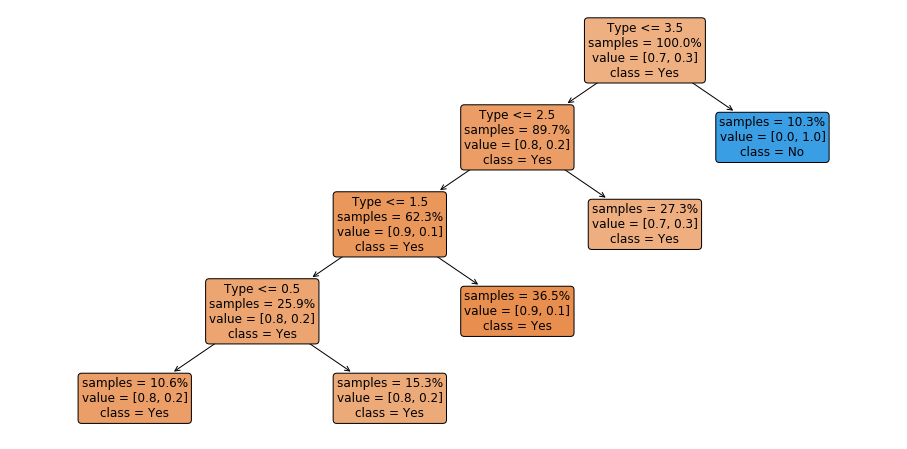

In [47]:
plot_new_tree(["Type"])

In [48]:
forest = RandomForestClassifier(n_estimators=150, # number of trees 
                                  max_depth = 15)

# model training
forest.fit(X=x1,
             y=x2)

# prediction
result = forest.predict(y[features])
accuracy = accuracy_score(y2, result)
recall = recall_score(y2, result, average="weighted")
precision = precision_score(y2, result, average="weighted")
confusion = confusion_matrix(y2, result)

print("Random Forest Classifier Results")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(confusion)

Random Forest Classifier Results
Accuracy    :  0.8506756554007422
Recall      :  0.8506756554007422
Precision   :  0.855251005711416
Confusion Matrix: 
[[71845  1723]
 [13206 13203]]


I performed one extra test for the last question to make sure all the accuracy scores were good. In conclusion, one can predict if a crime would get arrested or not based on the type of crime and the location descriptions.